In [6]:
import random,string,math,csv
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '/Users/ykarmim/Documents/Cours/Master/M2/REDS/src') # Mettre le path vers src sinon l'import fail.

from dataset import Dataset
from evaluation import Evaluation

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

In [13]:
dataset = Dataset(file_path="../data/cern/atlas-higgs-challenge-2014-v2.csv",drop_weight=True)
higgs_df = dataset.get_df()
Xtrain,Xtest, ytrain,ytest = dataset.split_train_test(fill_nan=False)
weight_train,weight_test = dataset.get_weight_train_test()
eval_ = Evaluation()

In [14]:
train_df = dataset.higgs_df_train

In [15]:
train_df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,s
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,b
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,b
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,...,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,b
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,...,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,55.892,...,144.665,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,b
249996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,50.618,...,80.408,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,b
249997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,120.462,...,198.907,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,s
249998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,55.859,...,112.718,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,b


## Heatmap of correlation 

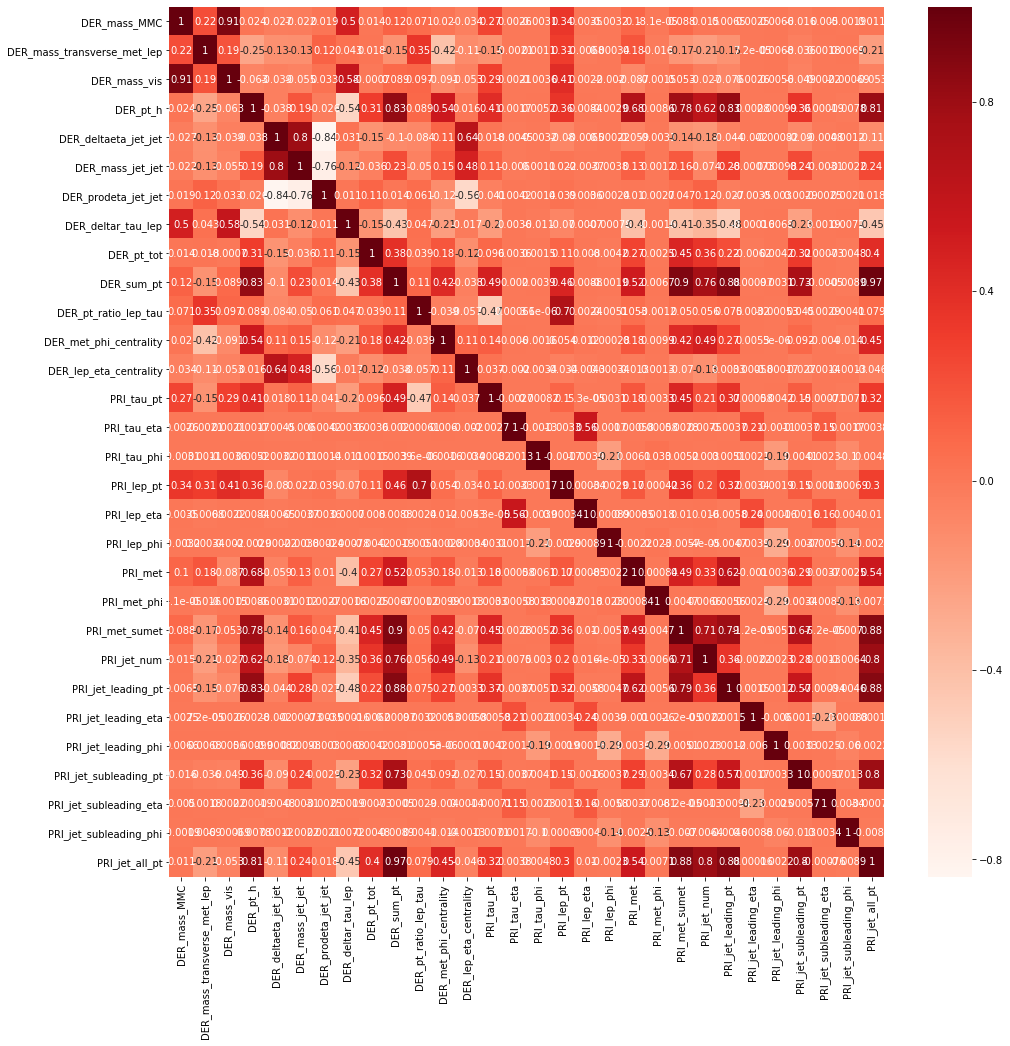

In [21]:
#HeatMap
plt.figure(figsize=(16,16))
cor = train_df.corr()
#cor.index = train_df.columns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('../rapports/figures/heatmap.png')
plt.show()

## Regarder les distributions des valeurs

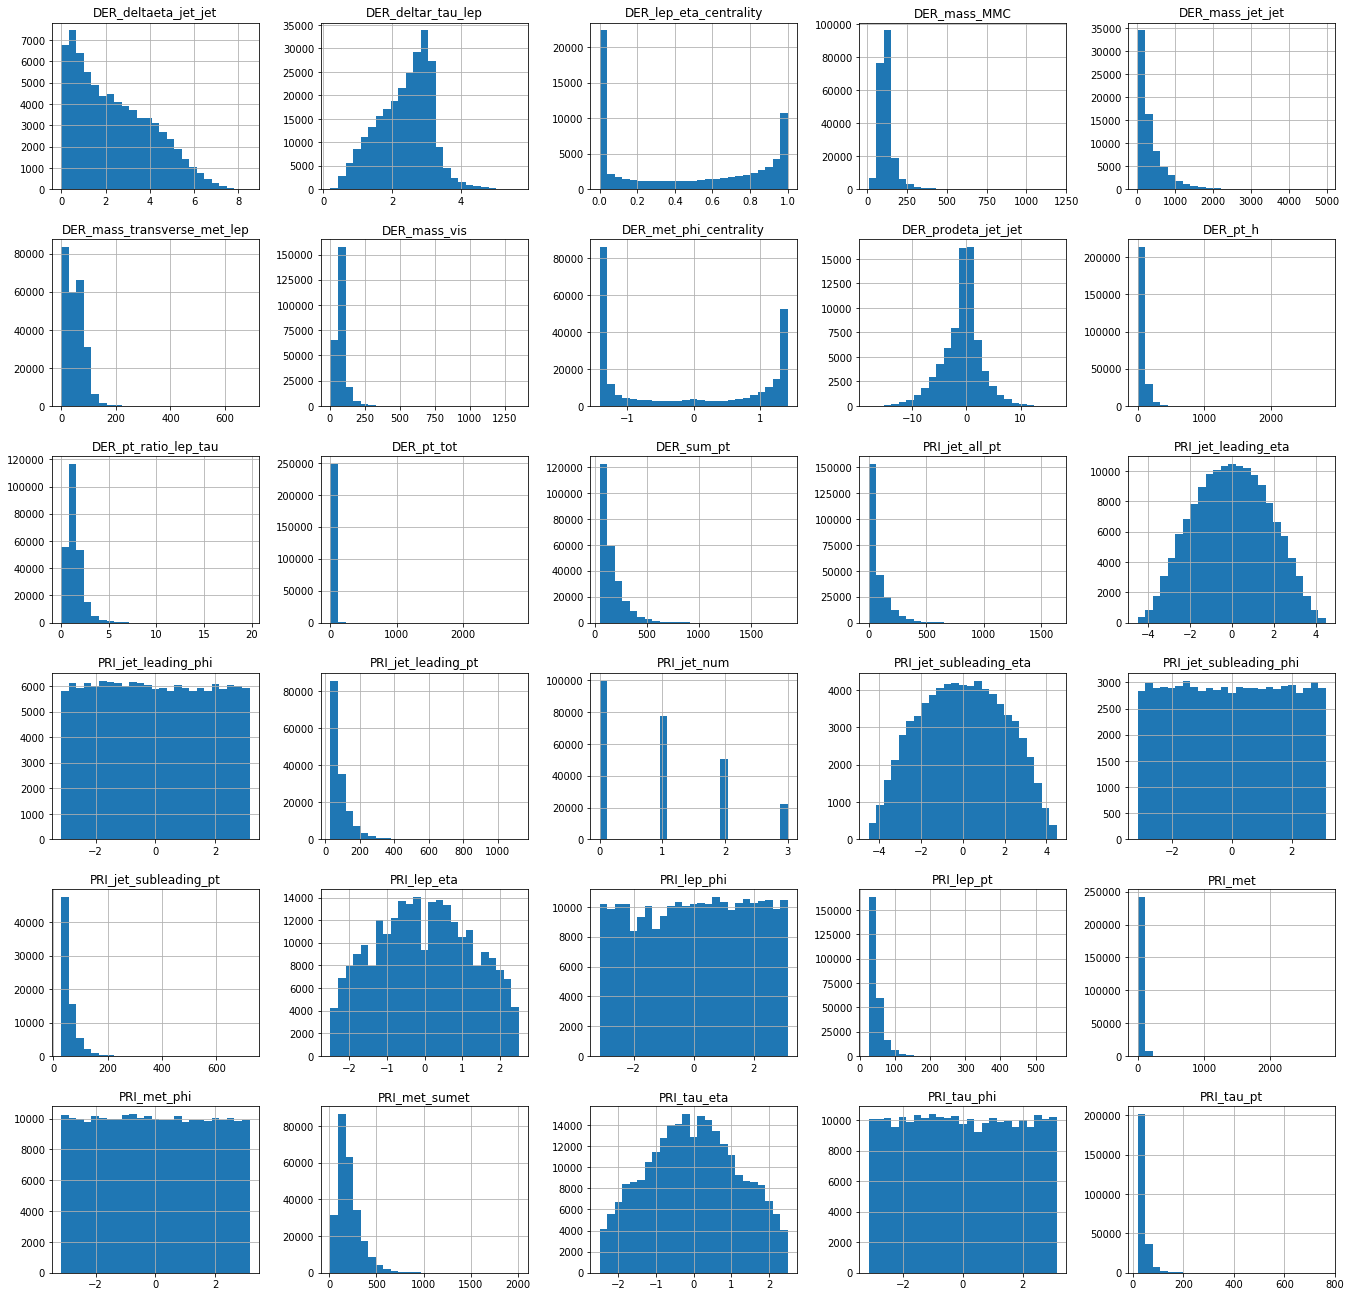

In [23]:
hist = train_df.hist(bins=25, figsize=(23,23))
plt.savefig('../rapports/figures/histograms.png')

## Analyse des valeurs manquantes

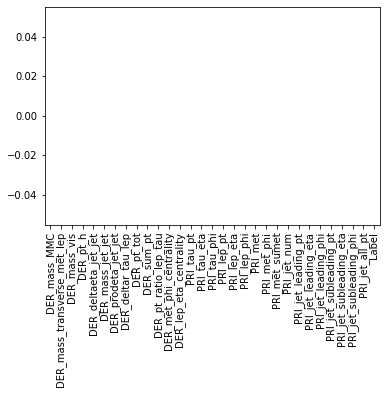

In [29]:
df_nan = train_df== np.nan

count_nan = df_nan.sum(0)
count_nan.plot.bar()

## Séléctions de valeurs 

In [34]:
dataset = Dataset(file_path="../data/cern/atlas-higgs-challenge-2014-v2.csv",drop_weight=True)
higgs_df = dataset.get_df()
Xtrain,Xtest, ytrain,ytest = dataset.split_train_test(fill_nan=True)
weight_train,weight_test = dataset.get_weight_train_test()
train_df = dataset.higgs_df_train

Feature ranking:
1. feature 1 (0.083521)
2. feature 0 (0.082436)
3. feature 11 (0.081615)
4. feature 2 (0.062794)
5. feature 7 (0.057253)
6. feature 13 (0.053828)
7. feature 10 (0.045031)
8. feature 19 (0.042400)
9. feature 9 (0.033875)
10. feature 17 (0.033468)
11. feature 16 (0.032847)
12. feature 3 (0.032707)
13. feature 14 (0.031316)
14. feature 8 (0.030394)
15. feature 21 (0.028521)
16. feature 18 (0.027295)
17. feature 20 (0.026547)
18. feature 15 (0.026182)
19. feature 24 (0.024228)
20. feature 12 (0.023520)
21. feature 4 (0.021719)
22. feature 23 (0.017750)
23. feature 29 (0.016987)
24. feature 6 (0.016942)
25. feature 25 (0.016634)
26. feature 22 (0.014015)
27. feature 5 (0.013491)
28. feature 27 (0.008190)
29. feature 28 (0.007249)
30. feature 26 (0.007245)


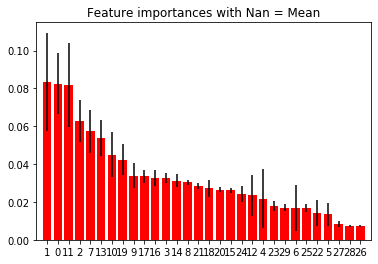

In [37]:
# Build a forest and compute the feature importances with Nan = median
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

forestMedian = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forestMedian.fit(Xtrain, ytrain)
importancesMedian = forestMedian.feature_importances_
stdMedian = np.std([tree.feature_importances_ for tree in forestMedian.estimators_],
             axis=0)
indicesMedian = np.argsort(importancesMedian)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xtrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indicesMedian[f], importancesMedian[indicesMedian[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances with Nan = Mean")
plt.bar(range(Xtrain.shape[1]), importancesMedian[indicesMedian],
       color="r", yerr=stdMedian[indicesMedian], align="center")
plt.xticks(range(Xtrain.shape[1]), indicesMedian)
plt.xlim([-1, Xtrain.shape[1]])
plt.savefig('../rapports/figures/importancesfeatures.png')
plt.show()

In [39]:

finalDataMean = train_df[train_df.columns[indicesMedian[0:9]]]
finalDataMean

,DER_mass_transverse_met_lep,DER_mass_MMC,DER_met_phi_centrality,DER_mass_vis,DER_deltar_tau_lep,PRI_tau_pt,DER_pt_ratio_lep_tau,PRI_met,DER_sum_pt
0,51.655,138.470000,1.396,97.827,3.064,32.638,1.582,16.824,197.760
1,68.768,160.937000,1.414,103.235,3.473,42.014,0.879,44.704,125.157
2,162.172,121.858528,1.414,125.953,3.148,32.154,3.776,54.283,197.814
3,81.417,143.905000,-1.285,80.943,3.310,22.647,2.354,31.082,75.968
4,16.915,175.864000,-1.385,134.805,3.891,28.209,1.056,2.723,57.983
...,...,...,...,...,...,...,...,...,...
249995,71.989,121.858528,-1.414,36.548,1.392,24.754,1.258,46.520,55.892
249996,58.179,121.858528,-1.345,68.083,2.585,23.416,1.162,46.737,50.618
249997,60.526,105.457000,0.529,75.839,2.390,35.636,1.202,23.419,120.462
249998,19.362,94.951000,1.414,68.812,3.365,27.944,0.999,12.150,55.859


In [42]:
finalDataMean.columns

Index(['DER_mass_transverse_met_lep', 'DER_mass_MMC', 'DER_met_phi_centrality',
       'DER_mass_vis', 'DER_deltar_tau_lep', 'PRI_tau_pt',
       'DER_pt_ratio_lep_tau', 'PRI_met', 'DER_sum_pt'],
      dtype='object')

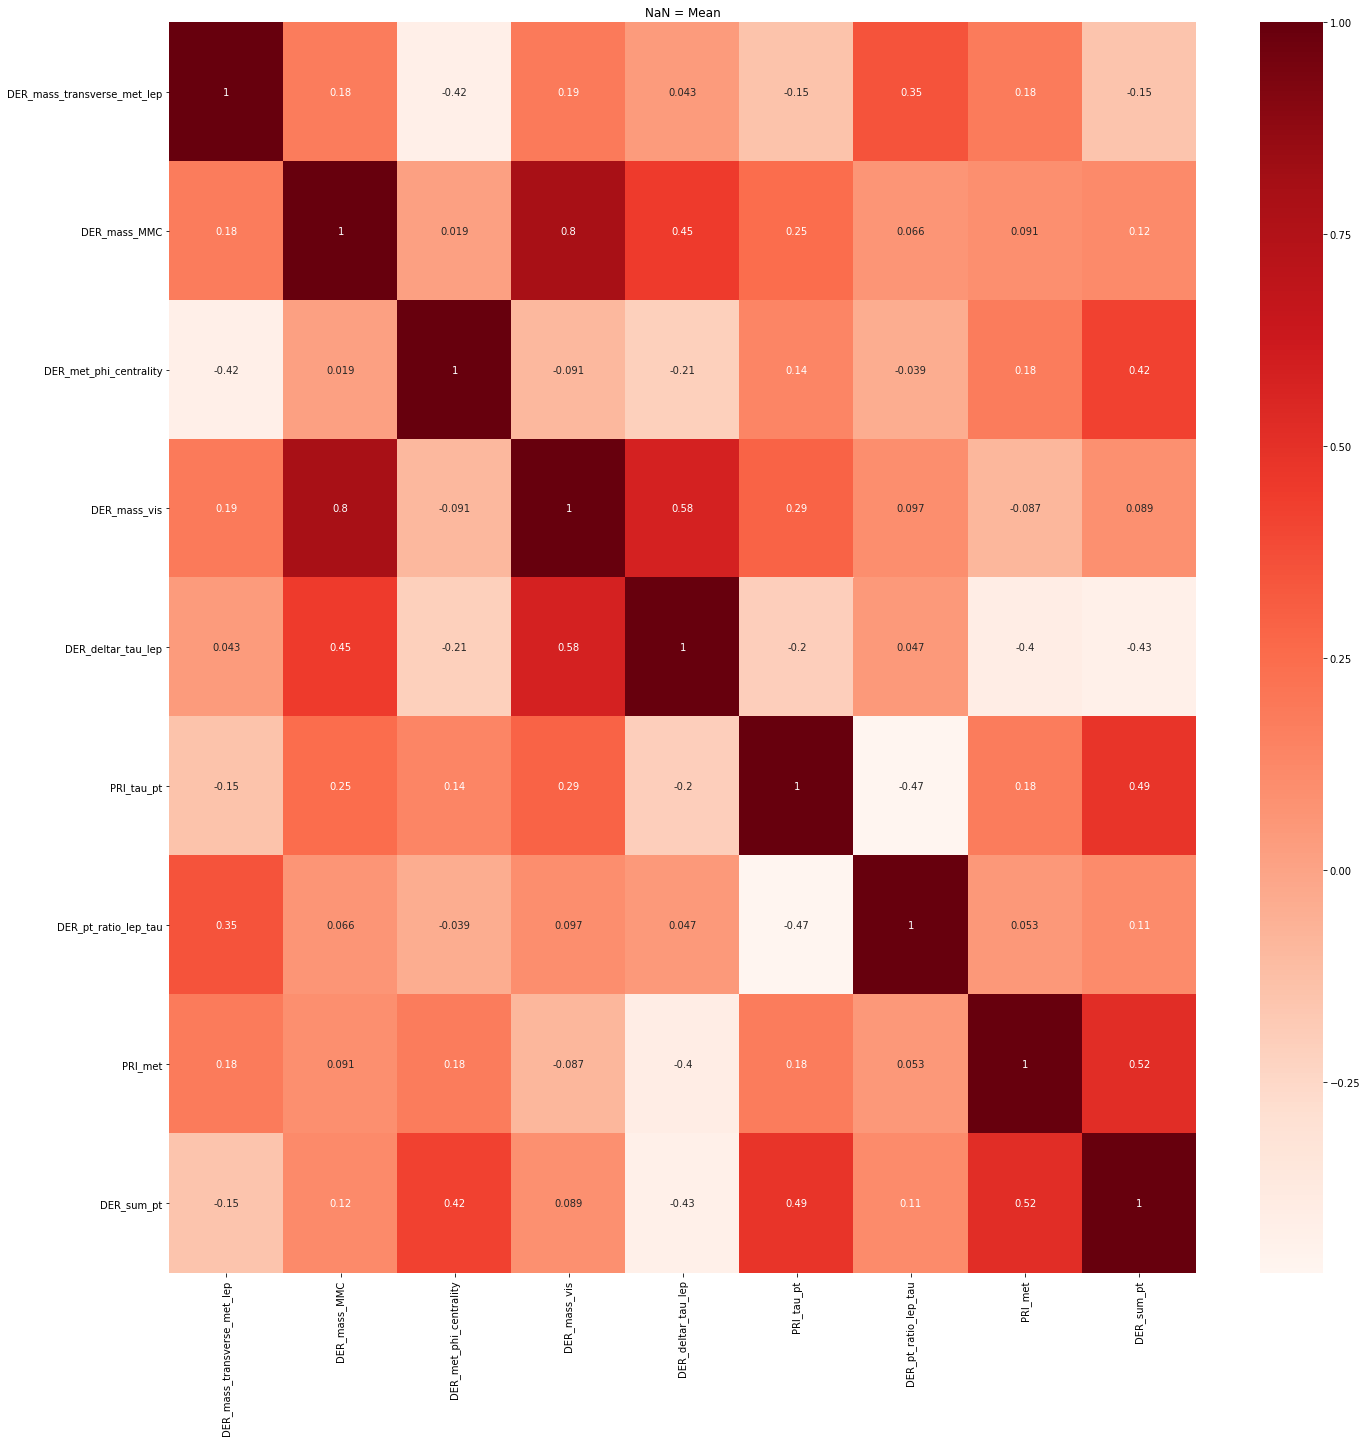

In [41]:
#HeatMap
plt.figure(figsize=(23,23))
plt.title("NaN = Mean")
cor = finalDataMean.corr()
cor.index = finalDataMean.columns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('../rapports/figures/newHeatmapMean.png')
plt.show()

## PCA 

In [47]:
# 92 % de variance garder 
from random import shuffle
from sklearn import decomposition
def sample(X_train,Y_train,prc):
    inds = np.arange(len(X_train))
    shuffle(inds)
    prc = int(len(inds)*prc)
    X_new = X_train[inds[:prc]]
    Y_new = Y_train[inds[:prc]]

    return X_new,Y_new
def data_labels2D(X,Y_new):
    Xb = []
    Xs = []
    for i,y in enumerate(Y_new):
        if y == 'b':
            Xb.append(X[i])
        else : 
            Xs.append(X[i])

    Xb = np.array(Xb)
    Xb = Xb.T
    Xb1 = Xb[0]
    Xb2 = Xb[1]
    Xs = np.array(Xs)
    Xs = Xs.T
    Xs1 = Xs[0]
    Xs2 = Xs[1]
    return Xb1,Xb2,Xs1,Xs2

def data_labels3D(X,Y_new):
    Xb = []
    Xs = []
    for i,y in enumerate(Y_new):
        if y == 'b':
            Xb.append(X[i])
        else : 
            Xs.append(X[i])

    Xb = np.array(Xb)
    Xb = Xb.T
    Xb1 = Xb[0]
    Xb2 = Xb[1]
    Xb3 = Xb[2]
    Xs = np.array(Xs)
    Xs = Xs.T
    Xs1 = Xs[0]
    Xs2 = Xs[1]
    Xs3 = Xs[2]
    return Xb1,Xb2,Xb3,Xs1,Xs2,Xs3


"\ny = []\nfor w in Y_train :\n    if w == 'b':\n        y.append(0)\n    else : \n        y.append(1)\ny=np.array(y)\n"

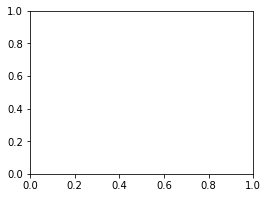

In [48]:
X_new,Y_new = sample(Xtrain,ytrain,0.2)




fig = plt.figure(1, figsize=(4, 3))
plt.clf()
plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X_new)
X = pca.transform(X_new)
Xb1,Xb2,Xs1,Xs2 = data_labels2D(X,Y_new)

"""
y = []
for w in Y_train :
    if w == 'b':
        y.append(0)
    else : 
        y.append(1)
y=np.array(y)
"""



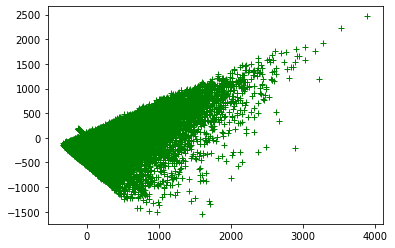

In [57]:
plt.plot(Xs1,Xs2,'g+')
plt.savefig('../rapports/figures/pca_classe_b.png')

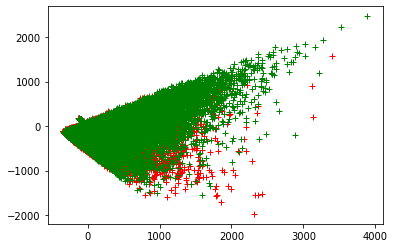

In [58]:
plt.figure()
plt.plot(Xb1,Xb2,'r+',Xs1,Xs2,'g+')
plt.savefig('../rapports/figures/pca_classe_b_s.png')

### 3D

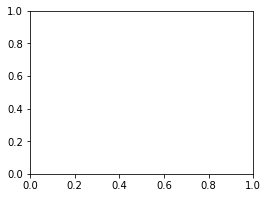

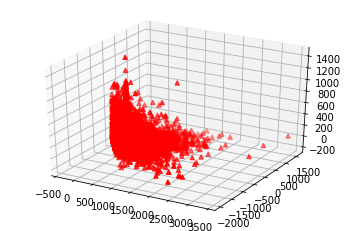

In [52]:
X_new,Y_new = sample(Xtrain,ytrain,1)
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_new)
X = pca.transform(X_new)
Xb1,Xb2,Xb3,Xs1,Xs2,Xs3 = data_labels3D(X,Y_new)
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(Xs1, Xs2, Xs3, marker='o',c='blue')
ax.scatter(Xb1,Xb2,Xb3, marker='^',c='red')
plt.show()

In [68]:
dataset = Dataset(file_path="../data/cern/atlas-higgs-challenge-2014-v2.csv",drop_weight=True)
higgs_df = dataset.get_df()
Xtrain,Xtest, ytrain,ytest = dataset.split_train_test(fill_nan=True)
train_df = dataset.higgs_df_train
train_df_no_lab = train_df.drop(['Label'],axis=1)

In [66]:
classe_s = train_df[train_df.Label=='s'].drop(['Label'],axis=1)
classe_b = train_df[train_df.Label=='b'].drop(['Label'],axis=1)


In [71]:
columns = train_df.columns
print(columns[0])


DER_mass_MMC


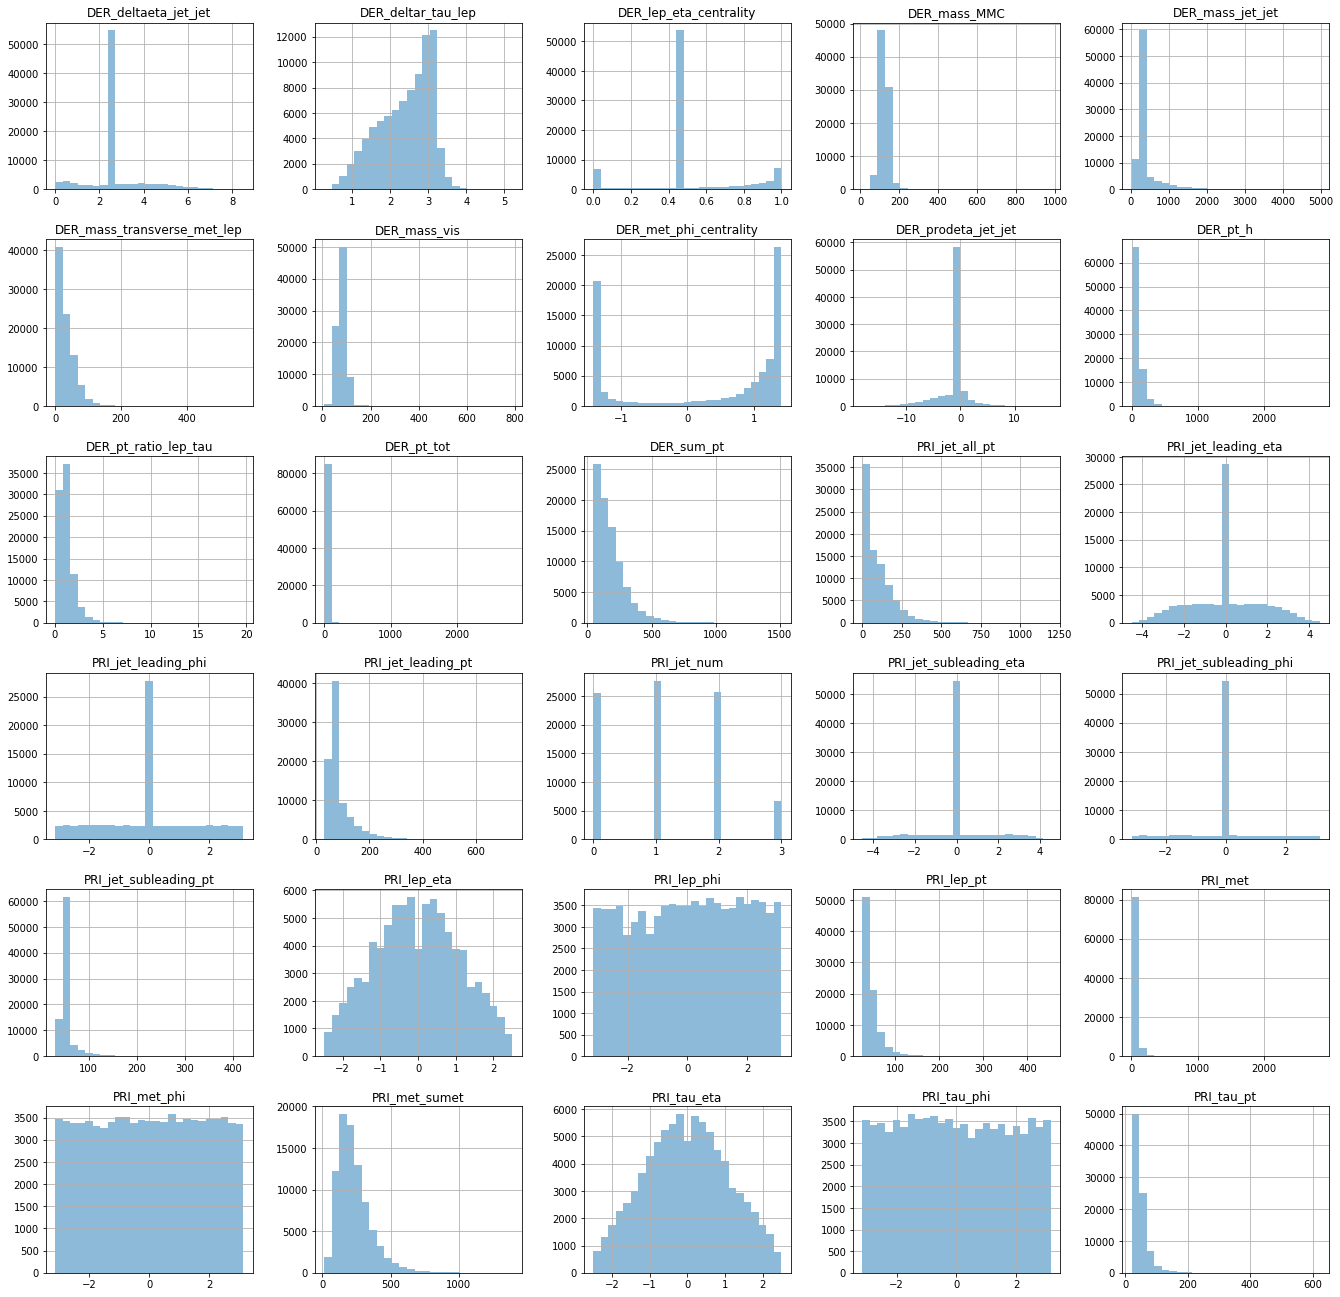

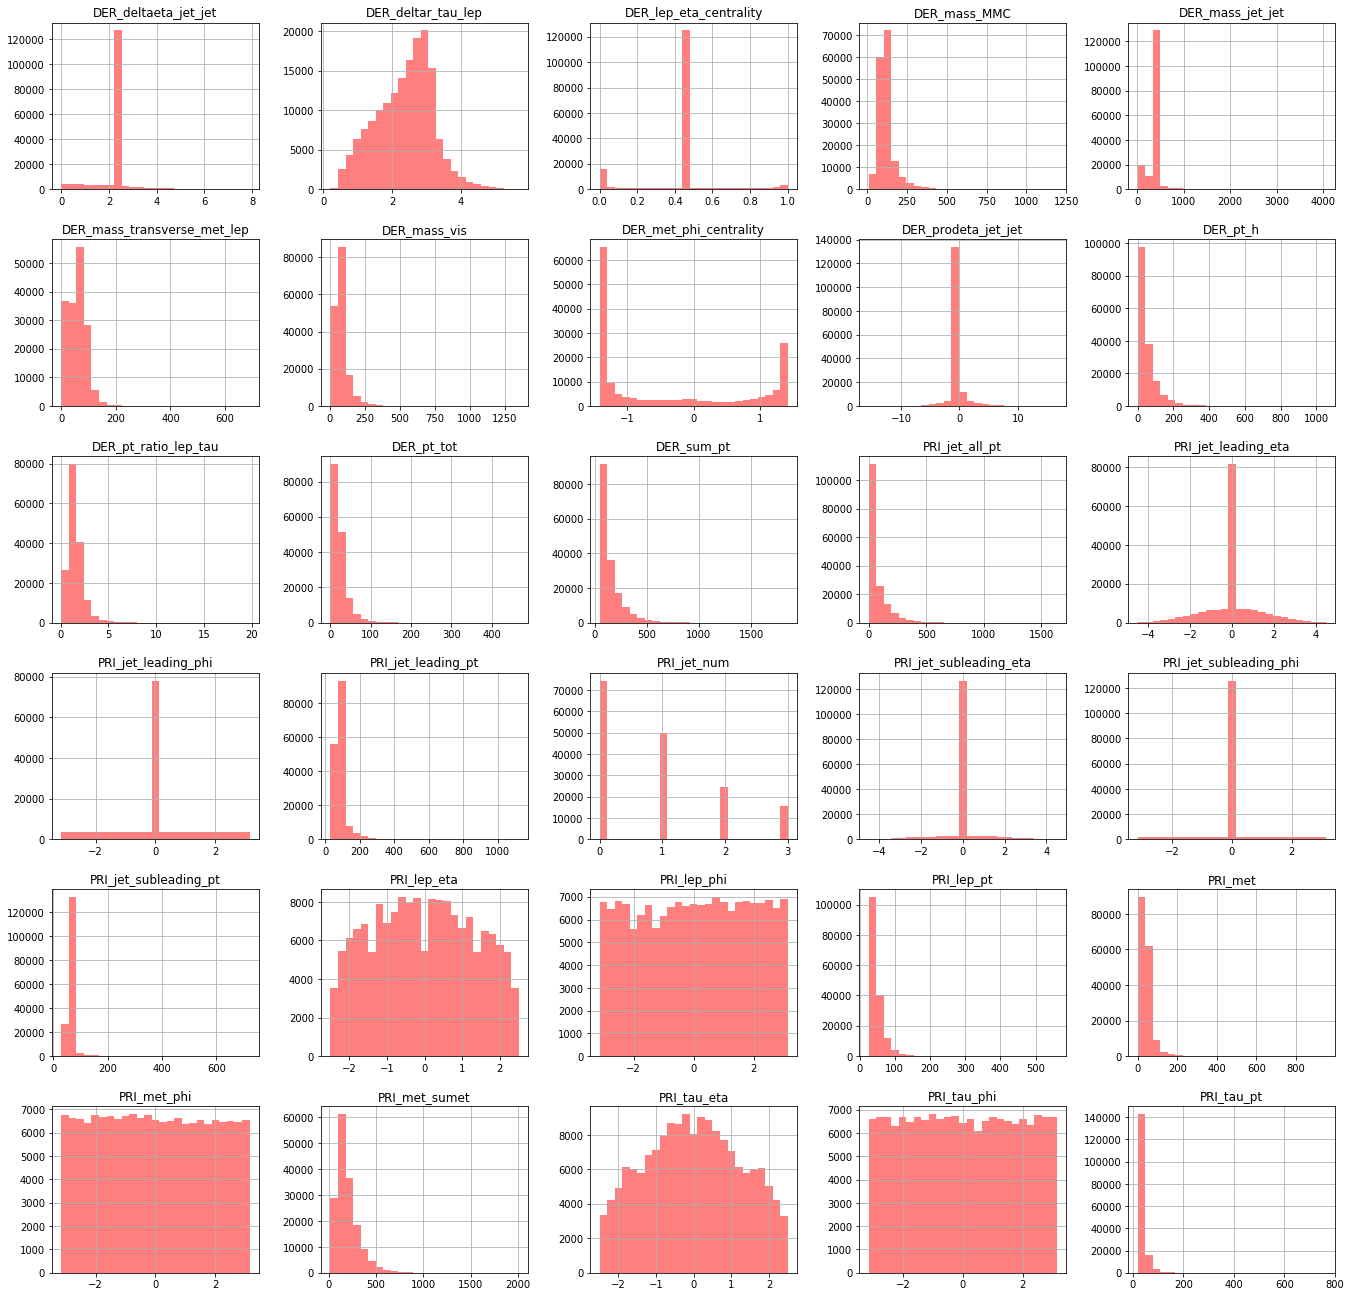

In [80]:
hist = classe_s.hist(bins=25, figsize=(23,23),alpha=0.5)
hist = classe_b.hist(bins=25, figsize=(23,23),alpha=0.5,color='red')
plt.savefig('../rapports/figures/histograms_classe_s.png')


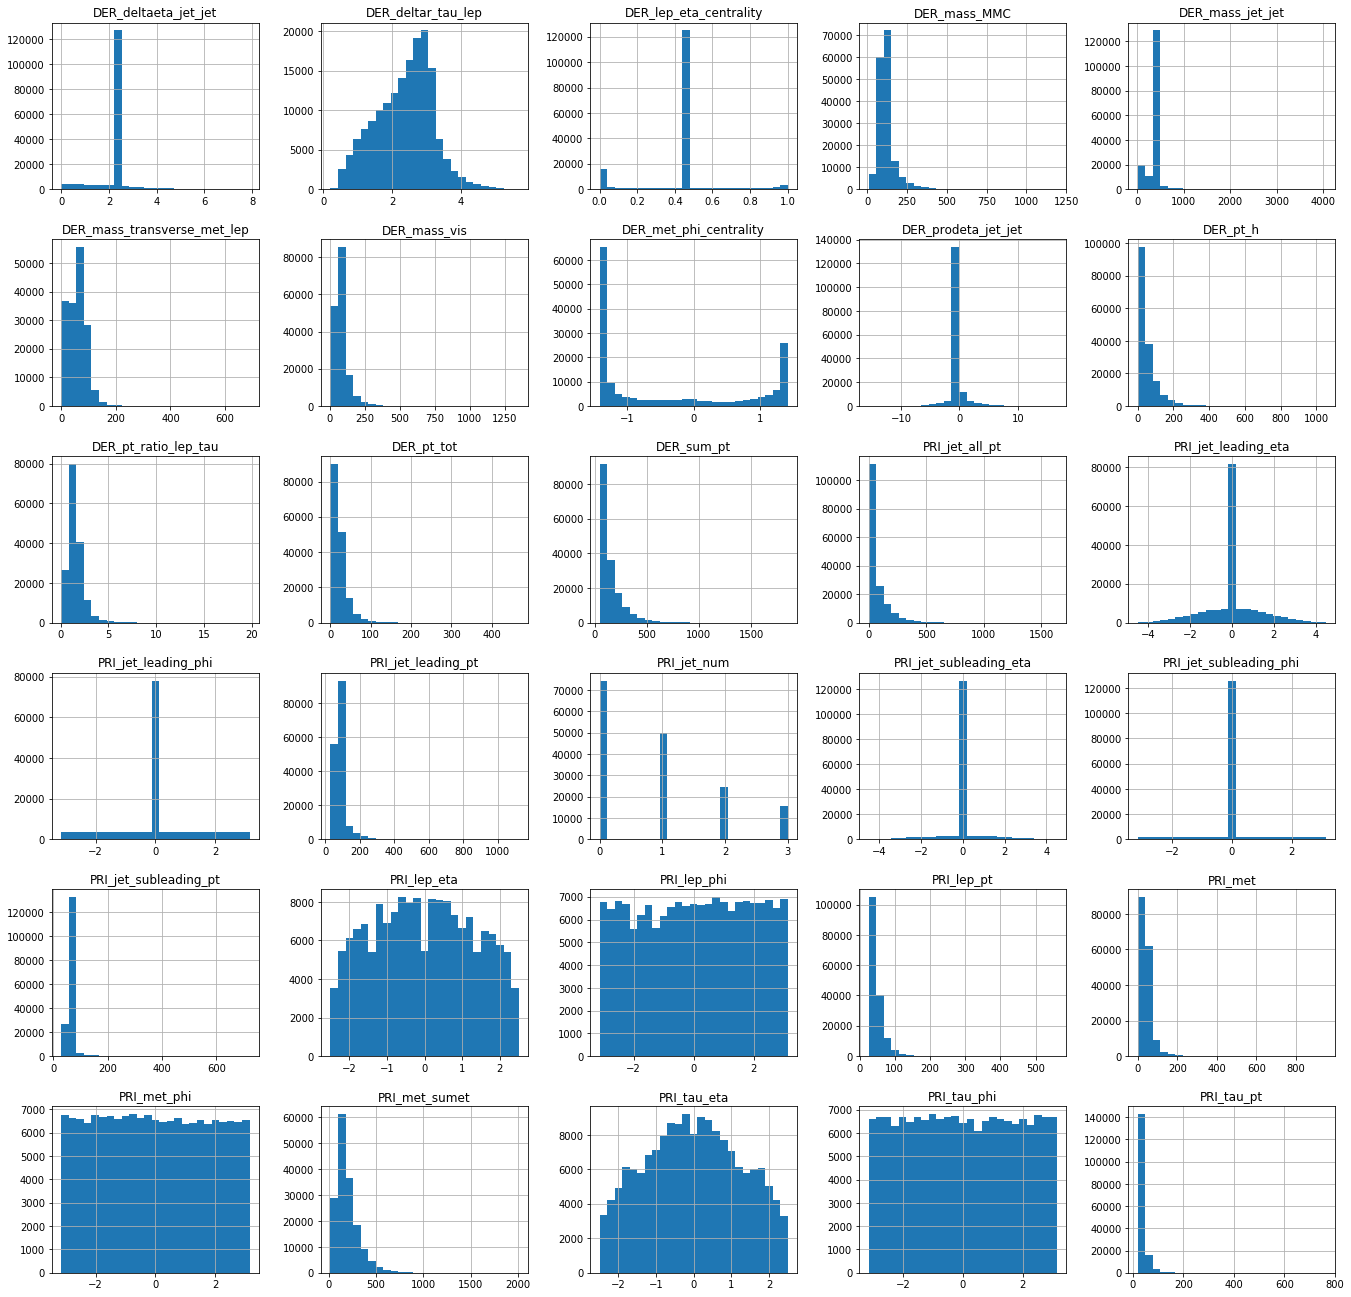

In [78]:
hist = classe_b.hist(bins=25, figsize=(23,23))
plt.savefig('../rapports/figures/histograms_classe_b.png')

In [84]:
fig,axes =plt.subplots(10,3, figsize=(23, 23)) # 3 columns each containing 10 figures, total 30 features
ax=axes.ravel()
for i in range(30):
  _,bins=np.histogram(train_df_no_lab.values[:,i],bins=40)
  ax[i].hist(classe_s.values[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(classe_b.values[:,i],bins=bins,color='g',alpha=0.3)# alpha is  for transparency in the overlapped region 
  ax[i].set_title(train_df.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  #ax[i].set_yticks(())ax[0].legend(['s','b'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

SyntaxError: invalid syntax (<ipython-input-84-027d1ce2e43d>, line 9)